# Trabalho Final

## Aluno: Leodécio Braz 
### Matricula: 377594

#### Dataset: Credit Card Fraude
* https://www.kaggle.com/mlg-ulb/creditcardfraud
    * 284807 x 31
* Classification Problem
    * Supervised learning
* Utilizaremos alguma métricas para análise, porém, como critério de escolha utilizamos a métrica Recall.
* Tabalho relacionado
    * https://www.kaggle.com/joparga3/in-depth-skewed-data-classif-93-recall-acc-now

In [1]:
%matplotlib inline
## util
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## modelos
from sklearn import linear_model, neighbors, svm, naive_bayes
from sklearn.ensemble import RandomForestClassifier

# 
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn import metrics
from sklearn import preprocessing
import seaborn as sns

### Método utilizado por cada modelo de classificação que será comparado

In [2]:
def classification(model,X_,y_):
    accuracy = 0.0
    recall = 0.0
    f1 = 0.0
    auc = 0.0
    for train_index, test_index in kfold.split(X_,y_):
        X_train = X_[train_index]
        y_train = y_[train_index]
        X_test = X_[test_index]
        y_test = y_[test_index]
        
        #norm = preprocessing.MinMaxScaler().fit(X_train)
        #X_train_norm = norm.transform(X_train)
        #X_test_norm = norm.transform(X_test)
        
        #model.fit(X_train_norm,y_train)
        #y_pred = model.predict(X_test_norm)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        
        accuracy += metrics.accuracy_score(y_test,y_pred)
        recall += metrics.recall_score(y_test,y_pred)
        f1 += metrics.f1_score(y_test,y_pred)
        auc += metrics.roc_auc_score(y_test,y_pred)
    print("accuracy: " + str((accuracy/nSplits)) + "\nrecall: "+ str((recall/nSplits)) +
          "\nf1: "+ str((f1/nSplits)) + "\nauc: "+ str((auc/nSplits)))

### K-fold com K = 7

In [3]:
nSplits = 7
kfold = StratifiedKFold(n_splits=nSplits)

## Ler o dataset

In [4]:
df = pd.read_csv('creditcard.csv')

In [5]:
print(df.shape)
df.head(5)

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### O dataset não possui valores em falta/nulos

## Histograma de distribuição de cada classe no dataset

Text(0,0.5,'Frequencia')

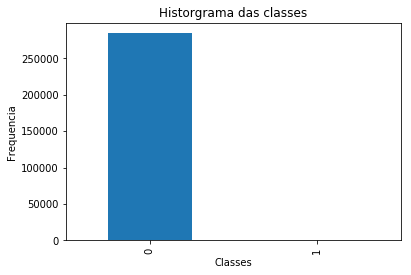

In [7]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Historgrama das classes")
plt.xlabel("Classes")
plt.ylabel("Frequencia")

### Como mostrar o histograma acima, a classes no dataset são altamente desbalanceadas <br /> por isso, a acurácia obtida nos três modelos testados abaixo tiveram bons resultados para a classificação da classe majoritária '0', porém para classificar a classe '1', não acertariamos.
  * 0 = Não fraude
  * 1 = Fraude

### Correlação de cada Feature

In [8]:
for i in df.columns:
    if i != 'Class':
        print(i + ' -> Class: ' + str(df[i].corr(df['Class'])))

Time -> Class: -0.012322570929245826
V1 -> Class: -0.10134729859508675
V2 -> Class: 0.0912886503446208
V3 -> Class: -0.1929608270674163
V4 -> Class: 0.1334474862390066
V5 -> Class: -0.09497429899145005
V6 -> Class: -0.04364316069996468
V7 -> Class: -0.1872565915143011
V8 -> Class: 0.019875123914794613
V9 -> Class: -0.09773268607408046
V10 -> Class: -0.2168829436410312
V11 -> Class: 0.1548756447439499
V12 -> Class: -0.2605929248772219
V13 -> Class: -0.0045697787994613305
V14 -> Class: -0.3025436958044091
V15 -> Class: -0.004223402267856751
V16 -> Class: -0.19653894030402153
V17 -> Class: -0.3264810672437191
V18 -> Class: -0.11148525388904272
V19 -> Class: 0.034783013036515445
V20 -> Class: 0.0200903241969757
V21 -> Class: 0.04041338061057619
V22 -> Class: 0.0008053175052984831
V23 -> Class: -0.0026851557402507273
V24 -> Class: -0.007220906715952826
V25 -> Class: 0.003307705597299701
V26 -> Class: 0.00445539750128341
V27 -> Class: 0.01757972818951358
V28 -> Class: 0.00953604091623634
Amo

## Usando todos as features do dataframe

In [9]:
X1 = df.values[:,:30]
y1 = df.values[::,30]

#### LogisticRegression

In [10]:
modelLoR = linear_model.LogisticRegression()
classification(modelLoR,X1,y1)

accuracy: 0.9973070008655063
recall: 0.5839609083069848
f1: 0.5527612957250929
auc: 0.7909903688132144


## Reduzindo features não relevantes

In [11]:
df = df.drop(['Time'],axis=1)

df.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Novos valores de X e y
#### Aplicando standardização em X

In [12]:
X2 = df.values[:, df.columns != 'Class']
y2 = df.values[:, df.columns == 'Class']

#Standadização em X
X2 = preprocessing.StandardScaler().fit_transform(X2)

## Aplicar um resample nos dados

In [13]:
#Numero de vezes em que a classe '1' ocorre
n_classe_1 = len(y2[y2 == 1])
fraud_indices = np.array(df[df.Class == 1].index)

#indices em que a classe '0' ocorre
normal_indices = df[df.Class == 0].index

#Selecionando de forma aleatoria indices de operações não fraudelentas
## Apesar de ocorrer de forma mais frequente, definimos suas quantidade como 4 vezes a quantidade de fraudes
random_normal_indices = np.random.choice(normal_indices, 4*n_classe_1, replace = False)
random_normal_indices = np.array(random_normal_indices)

#Concatenamos os indices fraudulentos e não fraudulentos
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [14]:
X_ = X2[under_sample_indices]
y_ = y2[under_sample_indices]

new_df = pd.DataFrame(y_)

Text(0,0.5,'Frequencia')

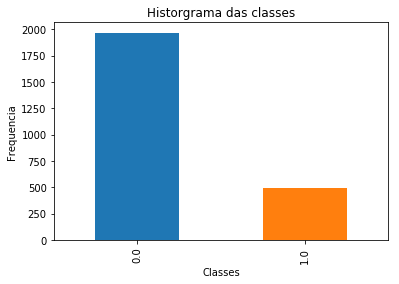

In [15]:
count_classes = pd.value_counts(new_df[0], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Historgrama das classes")
plt.xlabel("Classes")
plt.ylabel("Frequencia")

## Para previnir overfitting, isolamos um conjunto de teste equivalente a 30% do conjunto completo que será treinado.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.30, random_state=42, shuffle=True, stratify = y_)

### X e y que serão utilizados para treinar o modelo

In [17]:
X = X_train
y = y_train

### LogisticRegression

In [18]:
modelLoR2 = linear_model.LogisticRegression()
classification(modelLoR2,X,y)

accuracy: 0.9698000889193157
recall: 0.8834402332361515
f1: 0.9206460751419635
auc: 0.9373672877417827


/home/segundo/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### SVM Classifier

In [19]:
modelSvc2 = svm.SVC()
classification(modelSvc2,X,y)

/home/segundo/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy: 0.964566458839598
recall: 0.8834402332361516
f1: 0.9084414739732471
auc: 0.9340948039839576


### Naive Bayes

In [20]:
modelNB2 = naive_bayes.GaussianNB()
classification(modelNB2,X,y)

accuracy: 0.9471400770947547
recall: 0.8718367346938776
f1: 0.8677785942610468
auc: 0.9188603838924981


/home/segundo/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### KNN Classifier

In [21]:
modelKnn = neighbors.KNeighborsClassifier(n_neighbors=3)
classification(modelKnn,X,y)

/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


accuracy: 0.9715328256314871
recall: 0.8805247813411078
f1: 0.924397220568645
auc: 0.9373580382116588


### RandomForest

In [22]:
modelRF = RandomForestClassifier()
classification(modelRF,X,y)

/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main

accuracy: 0.9732773370037261
recall: 0.8805247813411078
f1: 0.9287458245158134
auc: 0.938445782954226


/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/home/segundo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


## Modelo escolhido: KNN

In [23]:
y_pred = modelKnn.predict(X_test)

/home/segundo/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


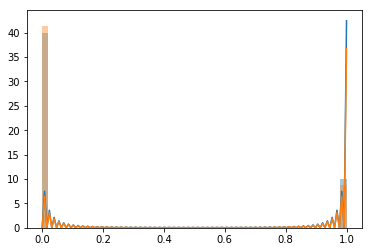

In [24]:
sns.distplot(y_test, bins=50)
sns.distplot(y_pred, bins=50)

plt.show()

#### Recall

In [25]:
recall = metrics.recall_score(y_test,y_pred)
print(recall)

0.831081081081081
